# Глава 17 Опорно-векторные машины(МО Крис Элбон)

Для того чтобы разобраться в принципе работы опорно-векторных машин (или машин опорных векторов), мы должны понимать, что такое гиперплоскости. Формально гиперплоскость является n-1 подпространством в n мерном пространстве.  Если мы хотим разделить двухмерное пространство, мы используем одномерную гиперплоскость ( т е прямую). Если мы хотим разделить трехмерное пространство, мы используем двухмерную гиперплоскость ( т е плоский лист бумаги). Гиперплоскость - всего лишь обобщение этого понятия до n размерностей.

Опорно-векторные машины классифицируют данные путем нахождения гиперплоскости, которая максимизирует допустимый промежуток между классами в тренировочных данных.

В двухмерном примере с двумя классами мы можем представить гиперплоскость как самую широкую прямую "полосу" ( т е линию с полями), которая разделяет два класса.

# Тренировка линейного классификатора

Требуется натренировать модель, чтобы классифицировать наблюдения.

Использовать опорно-векторный классификатор(support vector classifier, SVC), чтобы найти гиперплоскость, которая максимизирует промежутки (зазоры) между классами.

In [1]:
#загрузить библиотеки
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#загрузить данные с двумя классами и двумя признаками
iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]

In [3]:
#стандартизировать признаки
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [4]:
#создать опорно-векторный классификатор
svc = LinearSVC(C=1.0)

In [5]:
#натренировать модель
model = svc.fit(features_standardized, target)

Класс LinerSVC библиотеки scikit-learn реализует простой опорно-векторный классификатор (SVC).  Для того, чтобы на интуитивном уровне понять, что делает опорно-векторный классификатор, давайте выведем данные и гиперплоскость на график. Хотя опорно-векторные классификаторы хорошо работают в больших размерностях, в нашем решении мы загрузили только два признака и взяли подмножество наблюдений , чтобы данные содержали только два класса.
Это позволит визуализировать модель.

Напомним, что опорно-векторный классификатор пытается найти гиперплоскость  - прямую, когда имеется всего две размерности - с максимальным промежутком между классами.

Мы построим два класса на двумерном пространстве, а затем начертим гиперплоскость:

In [6]:
#загрузить библиотеку
from matplotlib import pyplot as plt

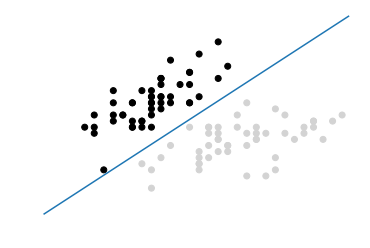

In [11]:
#вывести точки данных на график и расцветить, используя их класс
color = ["black" if c==0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:, 0], features_standardized[:, 1], c=color)
#создать гиперплоскость
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]
#начертить гиперплоскость
plt.plot(xx, yy)
plt.axis("off")
plt.show()

В этой визуализации все наблюдения класса 0 являются черными , а наблюдения класса 1 - светло-серыми. Гиперплоскость - это граница решения, определяющая то, как классифицируются новые наблюдения.

В частности, любое наблюдение над прямой будет отнесено к классу 0, а любое наблюдение под прямой - к классу 1.

Мы можем это доказать, создав новое наблюдение в левом верхнем углу нашей визуализации, подразумевая, что оно должно быть предсказано как класс 0:

In [12]:
#создать новое наблюдение
new_observation = [[-2, 3]]

In [13]:
#предсказать класс нового наблюдения
svc.predict(new_observation)

array([0])

В отношении опорно-векторных классификаторов необходимо отметить несколько моментов. Во-первых, ради визуализации мы ограничили нашу задачу бинарным примером(двумя классами); однако опорно-векторные классификаторы могут хорошо работать с многочисленными классами.

Во-вторых как показывает наша визуализация, гиперплоскость по определению линейна ( т е не изогнута). Для данного примера это приемлемо, потому-что данные были линейно разделяемыми, т е имелась гиперплоскость, которая могла идеально разделить эти два класса. В реальном мире такое случается редко.

Более типичной является ситуация, когда мы не можем разделить классы идеально. В этих случаях существует баланс между максимизацией промежутка гиперплоскости и минимизации ошибочной классификации. 

В опорно-векторном классификаторе последнее контролируется с помощью гиперпараметра С - штрафа, налогаемого на ошибки. С - это параметр ученика SVC и штраф за ошибочное классифицирование точки данных. Когда значение С мало, классификатор получает одобрение на ошибочно классифицированные точки данных(высокое смещение, но низкая дисперсия). 

Когда значение С большое, классификатор сильно штрафуется за ошибочно классифицированные данные и поэтому отклоняется назад, чтобы избежать любых ошибочно классифицированных точек данных(низкое смещение, но высокая дисперсия).

https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%BB%D0%B5%D0%BC%D0%BC%D0%B0_%D1%81%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D1%8F%E2%80%93%D0%B4%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%B8

В библиотеке scikit-learn значение С определяется параметром С и по умолчанию С=1.0. Мы должны относиться к С, как к гиперпараметру, обучающегося алгоритма, который мы настраиваем, используя методы отбора модели.

# Обработка линейно неразделимых классов с помощью ядер

Требуется натренировать опорно-векторный классификатор, но ваши классы линейно неразделимы.

Натренировать расширение опорно-векторной машины с использованием ядерных функций для создания нелинейных границ решений.

In [2]:
#загрузить библиотеки
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
#задать начальное значение рандомизации
np.random.seed(0)

In [4]:
#сгенерировать 2 признака
features = np.random.randn(200, 2)

In [5]:
features.shape

(200, 2)

In [6]:
features

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [8]:
#применить вектор XOR чтобы сгенерировать линейно разделимые классы
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)

In [9]:
target_xor

array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,

In [10]:
target = np.where(target_xor, 0, 1)
target

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1])

In [11]:
#создать опорно-векторную машину с радиально базисным функциональным ядром (RBF ядром)
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

In [12]:
#натренировать классификатор
model = svc.fit(features, target)

Опорно-векторный классификатор может быть представлен согласно формуле:

\begin{equation*} f(x) = \beta_0 + {\sum_{i∈S} \alpha_i K(x_i, x_{i'} ) }\end{equation*}

beta_0 - смещение

S - набор всех опорно-векторных наблюдений

alpha_i - модельные параметры, которые необходимо заучить

(x_i, x_{i'}) - пары двух опорно-векторных наблюдений

K - ядерная функция, которая сравнивает сходство между x_i и х_i'

Важно: K - определяет тип гиперплоскости, используемой для разделения наших классов, мы создаем разные гиперплоскости, используя разные ядра.

https://slideplayer.com/slide/3481/1/images/16/Support+Vector+Machines.jpg

Например, если нам нужна элементарная линейная гиперплоскость, подобно той, что была в предыдущем примере, то можно использовать линейное ядро:

\begin{equation*} K(x_i, x_{i'}) =  {\sum_{j=1}^p  x_{ij} * x_{i'j}  }\end{equation*}

p - количество признаков

Пример линейного ядра(строки - элементы, столбцы - признаки)
(
1 2 3
4 5 6
)

Ядро:
1*4 + 2*5 + 3*6

Если нам нужна нелинейная граница решения , то вместо линейного ядра, мы подставляем полиноминальное ядро:

\begin{equation*} K(x_i, x_{i'}) = (1 + {\sum_{j=1}^p  x_ij * x_{i'j} )^2 }\end{equation*}

где 2 - это степень полиноминальной ядерной функции

Альтернатива: использовать использовать одно из наиболее распространенных ядер в опорно-векторных машинах - ядро радиально-базисной функции(радиально-базисное функциональное ядро).

\begin{equation*} K(x_i, x_{i'}) = exp (-\gamma{\sum_{j=1}^p  (x_ij * x_{i'j})^2)  }\end{equation*}

gamma - гиперпараметр, который должен быть больше 0

Основной смысл приведенного выше - если имеются линейно неразделимые данные, то вместо линейного ядра можно подставить альтернативное ядро и создать нелинейную гиперплоскостную границу решения.

Лежащую в основе ядер идею можно понять, выполнив визуализацию простого примера. Приведенная далее функция, основанная на функции Себастьяна Рашки, выводит на график наблюдение и гиперплоскость границы решения двумерного пространства.

In [28]:
#вывести на график наблюдения и гиперплоскость границы решения
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [43]:
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        print('idx =', idx, 'cl = ', cl)
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], 
                    alpha=0.8, c=cmap(idx), 
                    marker="+", label=cl)

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html

В нашем решении мы имеем данные, содержащие два признака( т е две размерности) и вектор целей с классом каждого наблюдения. Классы назначены так, что они линейно неразделимы. Т е нет прямой линии, которцю мы могли бы провести, чтобы разделить 2 класса.

Сначала создадим классификатор опорно-векторной машины с линейным ядром:

In [35]:
#создать опорно-векторный классификатор с линейным ядром
svc_linear =SVC(kernel="linear", random_state=0, C=1)

In [36]:
#натренировать модель
svc_linear.fit(features, target)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Далее, поскольку у нас только 2 признака, мы работаем в двумерном пространстве и можем визуализировать наблюдения, их классы и линейную гиперплоскость нашей модели.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


idx = 0 cl =  0
idx = 1 cl =  1


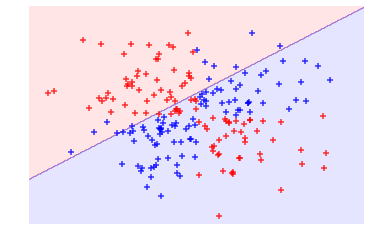

In [44]:
#вывести график наблюдения и гиперплоскость
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off")
plt.show()

Как мы видим линейная гиперплоскость плохо справилась с разделением 2- х классов. Теперь давайте вместо линейного ядра подставим радиально-базисное функциональное ядро и используем его для того, чтобы натренировать новую модель.

In [45]:
#создать опорно-векторную машину с радиально-базисным функциональным ядром (RBF-ядром)
svc = SVC(kernel='rbf', random_state=0, gamma=1, C=1)

In [46]:
#натренировать классификатор
model =svc.fit(features, target)

А затем визуализируем наблюдения и гиперплоскость.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


idx = 0 cl =  0
idx = 1 cl =  1


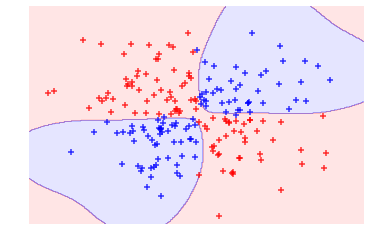

In [47]:
#вывести на график наблюдения и гиперплоскость
plot_decision_regions(features, target, classifier=svc)
plt.axis("off")
plt.show()

Применив радиально-базисное функциональное ядро, мы смогли создать границу решения, способную справиться с разделениемдвух классов гораздо лучше, чем линейное ядро. Этим обусловлено использование ядер в опорно-векторных машинах.

В библиотеке scikit-learn можно выбрать требуемое ядро с помощью параметра kernel. После того, как мы выберем ядро, нам нужно указать соответствующие параметры ядра, такие как значение d(используя параметр степени degree) в полиноминальных ядрах и гамма в радиально-базисных функциональных ядрах. Нам также нужно задать штрафной параметр С. 

Во время тренировки модели в большинстве случаев все они должны рассматриваться как гиперпараметры, при этом, чтобы определить комбинацию их значений, которая производит модель с наилучшей результативностью, мы должны использовать методы отбора модели.

# Создание предсказанных вероятностей

Требуется узнать предсказанные вероятности класса для наблюдения.

При использовании класса SVC библиотеки scikit-learn установить probability=True, натренировать модель, а затем для просмотра откалиброванных вероятностей применить метод predict_probe:

In [1]:
#загрузить библиотеки
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
#загрузить данные с двумя классами и двумя признаками
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [3]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [5]:
svc = SVC(kernel="linear", probability=True, random_state=0)

In [6]:
#натренировать классификатор
model = svc.fit(features_standardized, target)

In [7]:
#создать наблюдение
new_observation = [[.4, .4, .4, .4]]

In [8]:
#взглянуть на предсказанные вероятности
model.predict_proba(new_observation)

array([[0.00582525, 0.96725691, 0.02691783]])

Многие алгоритмы контролируемого самообучения, которые мы рассмотрели, используют для предсказания классов оценки вероятности. Например, в k ближайших соседях k классов соседей наблюдения рассматривались как голоса с целью создать вероятность того, что наблюдение принадлежит конкретному классу.
Затем предсказывается класс с наибольшей вероятностью. 

Использование гиперплоскости опорно-векторного классификатора (SVC) для создания областей принятия решений, естественно, не выводит оценку вероятности того, что наблюдение является членом определенного класса.

Однако калиброванные вероятности классов  можно фактически вывести с несколькими оговорками.

В SVC с двумя классами может использоваться шкалирование Платта, в котором сначала тренируется SVC, а затем тренеруется отдельная перекрестно-проверочная логитическая регрессия для отображения выходных данных SVC в вероятности:

\begin{equation*} P(y=1|x) =  \frac{1}{1 +  e^{a * f(x) + b}}\end{equation*}

a и b - параметрические векторы

f - расстояние со знаком i-го наблюдения от гиперплоскости

Если имеется более 2-х классов, то применяется расширение шкалирования Платта

С практической точки зрения создание предсказанных вероятностей имеет 2 основные проблемы.

1)Поскольку мы тренируем вторую модель с перекрестной проверкой, генерирование предсказанных вероятностей может значительно увеличить время, необходимое для того, чтобы натренировать нашу модель.

2)Поскольку предсказанные вероятностисоздаются с помощью перекрестной проверки, они не всегда могут совпадать с предсказанными классами. То есть, наблюдение может быть предсказано как класс 1, но с предсказанной вероятностью меньше 0.5 и принадлежностью к классу 1.

В библиотеке skikit-learn предсказанные вероятности должны генерироваться, когда модель тренируется. Это можно сделать, присвоив параметру probability объекта SVC значение True.

После того как модель натренирована, мы можем вывести оценочные вероятности для каждого класса, используя метод predict_proba.

# Идентификация опорных векторов

Требуется определить , какие наблюдения являются опорными векторами гиперплоскости решения.

Натренировать модель, а затем использовать атрибут support_vectors_

In [1]:
#загрузить библиотеки
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
#загрузить данные с двумя классами 
iris = datasets.load_iris()
features = iris.data[:100, :]
target = iris.target[:100]

In [4]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [5]:
#создать объект опорно-векторного классификатора
svc = SVC(kernel="linear", random_state=0)

In [6]:
#натренировать классификатор
model = svc.fit(features_standardized, target)

In [7]:
#взглянуть на опорные векторы
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

Опорно-векторные машины получили свое название благодаря тому, что гиперплоскость определяется относительно небольшим количеством наблюдений, называемых опорными векторами.

В интуитивном плане можно представить, что эти опорные векторы несут в себе гиперплоскость. Поэтому эти опорные векторы очень важны для нашей модели.

Например, если мы удалим из данных наблюдение, которое не является опорным вектором, модель не изменится. Однако если мы удалим опорный вектор, гиперплоскость не будет иметь максимального промежутка.

После того, как мы натренировали опорно-векторный классификатор, библиотека scikit-learn предлагает несколько вариантов идентификации опорного вектора. В нашем решении для вывода признаков фактических наблюдений четырех опорных векторов в нашей модели мы использовали атрибут support_vectors_.

В качестве альтернативы можно взглянуть на индексы опорных векторов, используя атрибут support_

In [8]:
model.support_

array([23, 41, 57, 98])

Наконец, чтобы найти количество опорных векторов, принадлежащих каждому классу, можно использовать атрибут n_support_

In [9]:
model.n_support_

array([2, 2])

# Обработка несбалансированных классов

Требуется натренировать опорно-векторный классификатор в присутствии несбалансированных классов.

Увеличить штраф, за ошибочное классифицирование меньшего по количеству класса с помощью параметра class_weight

In [10]:
#загрузить библиотеки
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [11]:
#загрузить данные с двумя классами 
iris = datasets.load_iris()
features = iris.data[:100, :]
target = iris.target[:100]

In [12]:
#сделать класс сильно несбалансированным, удалив 40 наблюдений
features =  features[40:, :]
target = target[40:]

In [ ]:
#создать вектор целей, указав класс 0 или 1
target = np.where(target == 0), 0, 1)

In [13]:
#стандартизировать признаки
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [14]:
#создать опорно-векторный классификатор
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)

In [15]:
#натренировать классификатор
model = svc.fit(features_standardized, target)

В опорно-векторных машинах С - это гиперпараметр, определяющий штраф за ошибочное классифицирование наблюдения. Одним из методов обработки несбалансированных классов в опорно-векторных машинах является взвешивание гиперпараметра С в зависимости от классов таким образом, что:

\begin{equation*} С_j =  C * w_i \end{equation*}

C - штраф за ошибочную классификацию

w_i - вес, обратнопропорциональный частоте класса j

C_j - значение С для класса j

Общая идея взвешивания состоит в том, чтобы увеличить штраф за ошибочное классифицирование миноритарных классов, чтобы они не были "подавлены" мажоритарным классом.

В библиотеке scikit-learn при использовании объекта SVC можно устанавливать значения для С_i автоматически, задав параметр class_weight = 'balanced'. Аргумент 'balanced' автоматически взвешивает подобные классы, таким образом, что:

\begin{equation*} w_j =  \frac{n}{k * n_j}\end{equation*}

w_j - вес класса j

n - количество наблюдений

n_j - количество наблюдений класса j

k - общее количество классов